<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/1_Cleansing_Join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Laden der wichtigsten Komponenten**

> Zuerst muss Pandas (unter der Abkürzung pd) und der Datensatz der csv-Datei ([hotel_orig.csv](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv)) als 'hotel_orig' in das Jupiter Notebook geladen und als Dataframe über die Funktion '`read.csv()`' gespeichert werden. Die Spalte 'reservation_status_date' wird mit dem 'parse_dates' Befehl als Dateityp Dateum übergeben.


In [ ]:
import pandas as pd
hotel_orig = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv', parse_dates=['reservation_status_date'])

> Um einen ersten Eindruck über den Datensatz sowie den Aufbau des Dataframes zu bekommen, wird das Dataframe ausgegeben. Um mehr als die nur die ersten und letzten 5 Zeilen angezeigt zu bekommen, setzen wir die minimale Anzahl an gezeigten Reihen mit `pd.set_option('display.min_rows', 50)` auf 50 und mit `pd.set_option('display.max_columns', 500)` können wir alle Variablen im Dataframe ausgeben lassen.


In [ ]:
# set options to show more rows and columns for exploration
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
hotel_orig

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


## **Erste relevante Strukturanpassungen als Vorbereitung für spätere Analysen**







> Da das Datum der Buchung in 3 verschiedenen Spalten (arrival_date_year, arrival_date_month, arrival_date_day_of_month) im Datensatz hinterlegt ist, werden diese Spalten zur einfacheren Auswertung vereint. Mit dem Befehl des Panda Paketes 'to_datetime' wird das anschließend, in Klammern stehende, Argument zu einem Datum transformiert. Es werden die drei einzelen Spalten zu einem String transformiert (`'astype(str)'`) und anschließend mit einem - voneinander getrennt, hintereinander weg in eine neue Spalte namens 'arrival_date' im Dataframe hinterlegt. Diese hat das Format yyyy-mm-dd.






In [ ]:
# melt various date columns to one readable date-column
hotel_orig['arrival_date'] = pd.to_datetime(hotel_orig.arrival_date_year.astype(str) + '-' + hotel_orig.arrival_date_month.astype(str) + '-' + hotel_orig.arrival_date_day_of_month.astype(str))

> Um die neue Spalte 'arrival_date' nicht als letzte Spalte des Dataframes anzuhängen, ändern wir über die Funktion '`insert()`' die Position der neuen Spalte zum Index 3 der x-Achse (der Achse, auf der die Spalten liegen). Dafür wird die Spalte, die ursprünglich am Ende eingefügt war, verwendet und am ursprünglichen Ort entfernt.

In [ ]:
# change order of columns (put new arrival_date-column to the beginning)
hotel_orig.insert(3, 'arrival_date', hotel_orig.pop('arrival_date'))



> Als ID in dem Dataframe wird nun die Spalte 'night_index' erstellt, welche einfach die Reihen von oben nach unten durchzählt und so einen eindeutigen Identifier bereitstellt. Dieser Index wird noch an Position 1 gesetzt.



In [ ]:
hotel_orig['night_index'] = range(len(hotel_orig))
hotel_orig.loc[:, 'night_index'] = range(len(hotel_orig))

In [ ]:
hotel_orig.insert(0, 'night_index', hotel_orig.pop('night_index'))



> Für spätere Analysen scheint eine noch nicht vorhandene Zeile im Datensatz wichtig, die Summe der Nächte, für jede Buchung. Hierfür werden die gebuchten Nächte in der Woche und die gebuchten Nächte am Wochenende aufsummiert und in einer neuen Spalte namens 'stay_nights_sum' abgespeichert.



In [ ]:
hotel_orig['stay_nights_sum'] = hotel_orig['stays_in_week_nights'] + hotel_orig['stays_in_weekend_nights']

> Mit der Funktion '`value_counts()`' kann im nächsten Schritt bestimmt werden, wie häufig ein gleicher Wert in einer bestimmten Spalte angegeben wurde. So haben die meisten buchenden Personen (27643) für 2 Nächte gebucht. Für sehr lange Zeiträume, beispielsweise für 34, 57 oder 43 Nächte, haben jeweils nur eine Person gebucht.


In [ ]:
hotel_orig.stay_nights_sum.value_counts() #.describe auch angucken

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: stay_nights_sum, dtype: int64

Im nächsten Schritt wird der Datensatz um die Spalte 'departure_date' erweitert. Hierfür ist die Funktion timedelta des Paketes datetime notwendig. Eine lambda Funktion fügt der 'arrival_date'-Zeit den Wert der Spalte "stay_nights_sum" Tage hinzu und gibt das Ergebnis zurück.

In [ ]:
from datetime import timedelta

hotel_orig['departure_date'] = hotel_orig.apply(lambda row: row['arrival_date'] + timedelta(days=row['stay_nights_sum']), axis=1)

In [ ]:
hotel_orig.departure_date.describe()

<ipython-input-10-b1b17073224a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hotel_orig.departure_date.describe()


count                  119390
unique                    806
top       2015-12-08 00:00:00
freq                      452
first     2015-07-01 00:00:00
last      2017-09-14 00:00:00
Name: departure_date, dtype: object

Die beiden Spalten 'departure_date' und 'stay_nights_sum' werden an passendere Positionen im Datensatz verschoben.

In [ ]:
hotel_orig.insert(5, 'departure_date', hotel_orig.pop('departure_date'))
hotel_orig.insert(12, 'stay_nights_sum', hotel_orig.pop('stay_nights_sum'))


> Das Dataframe kann nun durch Eingabe des gespeicherten Variablennamen und Ausführen der Codezelle mit den vorgenommenen Einstellungen und Änderungen angezeigt werden.



In [ ]:
# show datafrane
hotel_orig

,night_index,hotel,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,5,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,6,Resort Hotel,0,0,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,7,Resort Hotel,0,9,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,8,Resort Hotel,1,85,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,9,Resort Hotel,1,75,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22




---



# **Prüfung der Datenqualität**


> Im nächsten Schritt kann nun der vorliegende Satz auf fehlende Werte überprüft werden. Hierzu eignet sich die Funktion `isna()`. `isna()` ermittelt alle fehlende Werte pro Spalte und Zeile. Wird `isna()` mit `sum()` verkettet, so wird die Gesamtanzahl fehlender Werte pro Spalte ausgegeben.

> Im Hotel-Datensatz sind die meisten Zellen mit Werten gefüllt, lediglich vier Spalten enthalten 'Missing Values' (children, country, agent und company). In der 'children'-Spalte fehlen 4 Angaben, unter 'country' fehlen bei 488 Datenzeilen die jeweiligen Werte, bei 'agent' sind es sogar 16340 und unter 'company' wurden in 112593 Zeilen keine Angaben vorgenommen.



In [ ]:
# print sum of missing values per column
hotel_orig.isna().sum()

night_index                            0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date                           0
departure_date                         0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
stay_nights_sum                        0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_ty


> Durch Teilen der Summe aller fehlender Werte pro Spalte durch die Gesamtlände des Dataframes kann das Verhältnis fehlender Werte zu Gesamtwerten ermittelt werden. Wird dieses Ergebnis dann mit `apply('{0:.4%}'.format)` bearbeitet, wird es als Prozentwert ausgegeben.






> Die heraus stechenden Spalten sind, wie auch oben schon beschrieben, 'company' mit ~94.3% und 'agent' mit ~13.7%. Für die Spalten 'country' und 'children' wurde ein Prozentsatz an fehlenden Werten von ~0.4% bzw. 0.0034% errechnet.

> Die Spalte 'company' beschreibt dabei Geschäftskunden bzw. Kunden, die über ihr Unternehmen gebucht haben. Trotz der vielen Missing Values, spielen die Werte in dieser Spalte für das Projekt nur eine untergeordnete Rolle. Somit ist es nicht so wichtig, dass die Werte in dieser Spalte vollständig vorhanden sind.

> In der Spalte 'agent' konnten ebenfalls, im Vergleich zu anderen Spalten, viele Missing Values verzeichnet werden. In dieser Spalte wurden Buchungen festgehalten, die über ein Reisebüro getätigt wurden. Für das Projekt ist es nicht wichtig, dass diese Werte zwingend vorliegen, weshalb die Spalte 'agent' zu vernachlässigen ist.

> Dadurch, dass lediglich vier Spalten Missing Values enthalten und diese Spalten für die geplanten Anaylsen eher zweitrangig sind, lässt sich darauf schließen, dass der Datensatz für das Projekt gut geeignet ist.

In [ ]:
# print percentage of missing values per column
(hotel_orig.isna().sum()/len(hotel_orig)).apply('{0:.4%}'.format)

night_index                        0.0000%
hotel                              0.0000%
is_canceled                        0.0000%
lead_time                          0.0000%
arrival_date                       0.0000%
departure_date                     0.0000%
arrival_date_year                  0.0000%
arrival_date_month                 0.0000%
arrival_date_week_number           0.0000%
arrival_date_day_of_month          0.0000%
stays_in_weekend_nights            0.0000%
stays_in_week_nights               0.0000%
stay_nights_sum                    0.0000%
adults                             0.0000%
children                           0.0034%
babies                             0.0000%
meal                               0.0000%
country                            0.4087%
market_segment                     0.0000%
distribution_channel               0.0000%
is_repeated_guest                  0.0000%
previous_cancellations             0.0000%
previous_bookings_not_canceled     0.0000%
reserved_ro

> Die heraus stechenden Spalten sind, wie schon beschrieben, 'company' mit ~94.3% und 'agent' mit ~13.7%. Für die Spalten 'country' und 'children' wurde ein Prozentsatz an fehlenden Werten von ~0.4% bzw. 0.0034% errechnet. Da bei diesen Spalten die Anzahl fehlender Werte so gering sind, aber dennoch in die weiteren Analysen einfließen könnten, entfernen wir hier die Zeilen mit Missing Values.

In [ ]:
hotel_orig = hotel_orig.dropna(subset=['children', 'country'])
(hotel_orig.isna().sum()/len(hotel_orig)).apply('{0:.4%}'.format)

night_index                        0.0000%
hotel                              0.0000%
is_canceled                        0.0000%
lead_time                          0.0000%
arrival_date                       0.0000%
departure_date                     0.0000%
arrival_date_year                  0.0000%
arrival_date_month                 0.0000%
arrival_date_week_number           0.0000%
arrival_date_day_of_month          0.0000%
stays_in_weekend_nights            0.0000%
stays_in_week_nights               0.0000%
stay_nights_sum                    0.0000%
adults                             0.0000%
children                           0.0000%
babies                             0.0000%
meal                               0.0000%
country                            0.0000%
market_segment                     0.0000%
distribution_channel               0.0000%
is_repeated_guest                  0.0000%
previous_cancellations             0.0000%
previous_bookings_not_canceled     0.0000%
reserved_ro

> Die Spalte 'company' beschreibt Geschäftskunden bzw. Kunden, die über ihr Unternehmen gebucht haben. Missing Values in dieser Spalte bedeuten also, dass die Buchung von einer Privatperson bzw. über ein Reisebüro vorgenommen wurden. Das ist bei nahezu 95% der Zeilen der Fall. Wir entscheiden uns, nur diese Buchungen in den weiteren Verlauf mit einzubeziehen und entfernen die Zeilen, die von einem Unternehmen gebucht wurden. Daraufhin können wir die Spalte 'company' auch aus unserem Datensatz entfernen.

In [ ]:
# replacing the missing values in 'company' with the value 0
hotel_orig['company'] = hotel_orig['company'].fillna(0)

<ipython-input-16-b95a986a8839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_orig['company'] = hotel_orig['company'].fillna(0)


In [ ]:
# keeping only those rows with missing values in 'company, thus booked by an individual person
hotel_orig = hotel_orig.loc[hotel_orig['company'] == 0]

In [ ]:
# dropping the column 'company'
hotel_orig = hotel_orig.drop(columns=['company'], axis=1)

> Ein Missing Value in der Spalte 'agent' bedeutet jetzt, dass eine Privatperson nicht im Reisebüro sondern selbstständig gebucht hat. Uns genügt diese Kategorisierung, weshalb wir 'agents' eine binäre Variable umwandeln mit 1 für die Buchung über ein Reisebüro und 0 für die selbstständige Buchung.

In [ ]:
# replacing the missing values in 'agent' with the value 0
hotel_orig['agent'] = hotel_orig['agent'].fillna(0)

In [ ]:
# replacing the missing values in 'company' with the value 0 and all others with 1
hotel_orig['agent'] = hotel_orig['agent'].where(hotel_orig['agent'] == 0, 1)

In [ ]:
# changing the datatype of 'agent' from float to integer
hotel_orig = hotel_orig.astype({'agent': int})

> Nachdem wir nun einige Zeilen aus unserem Datensatz entfernt haben, setzen wir den Index zurück und ordnen auch unsere Identifier in 'night_index' neu zu.

In [ ]:
# resetting the index
hotel_orig = hotel_orig.reset_index(drop=True)
# re-assigning our identifier in 'night_index'
hotel_orig.loc[:, 'night_index'] = range(len(hotel_orig))

## **Überprüfen auf Logikfehler**

> Bei der Verzeichnung der Buchungen kann es möglicherweise zu Logikfehlern gekommen sein. Daher überlegen wir uns, welche Situationen unrealistisch und damit ein Datenfehler sein müssen.

> Bei den Buchungen sind folgende Fälle ein Indiz für fehlerafte Daten:

> (1) In einer Buchung sind weder Übernachtungen unter der Woche noch am Wochenende verzeichnet.

> (2) Eine Buchung zeigt eine negative Lead Time vor, das Buchungsdatum befindet sich demnach nach dem Ankunftsdatum.

> (3) Als Gäste sind Kinder, aber keine Erwachsenen, verzeichnet.

> (4) Als Gäste sind Babies, aber keine Erwachsenen, verzeichnet.

> (5) Weder Erwachsene noch Kinder noch Babies sind als Gäste verzeichnet.

> (6) Jemand ist zum wiederholten Mal Gast, hat aber bisher weder eine Buchung storniert noch wahrgenommen.

> (7) Eine Buchung ist nicht einheitlich als storniert registriert.

> Im Folgenden prüfen wir, ob die einzelnen Fälle in unserem Datensatz vorliegen und ziehen ggf. die notwendigen Konsequenzen.

> **(1) In einer Buchung sind weder Übernachtungen unter der Woche noch am Wochenende verzeichnet.**

> Auffällig ist, dass schon in den ersten Zeilen Am selben Tag gebucht wurde, an dem die Person(en) auch eingecheckt, aber keine Nacht im Hotel verbracht haben.

> Als erster Schritt der Prüfung auf einen Fehler bei der Eingabe wird ausgegeben, wie viele Buchungen vorliegen, bei denen Personen keine Nacht (weder am Wochenende noch unter der Woche) im Hotel verbracht haben. Dafür wird die `len()`-Funktion verwendet, die die Länge des Datensatzes, bzw. Anzahl an Zeilen, angeben soll, die nur Buchungen listet, bei denen unter 'stays_in_week_nights' und gleichzeitig unter 'stays_in_weekend_night' 0 angegeben ist. Durch Anwendung dieser Condition und Ausgabe des Ergebnisses wird erkenntlich, dass dies bei 627 Personen der Fall ist.

> Es scheint nicht sehr wahrscheinlich, dass bei 627 Buchungen ein zufälliger Fehler unterlaufen ist.





In [ ]:
# print sum of zero-nights spent at a hotel but booked anyway
num_zero_stays = len(hotel_orig[(hotel_orig['stays_in_week_nights'] == 0) & (hotel_orig['stays_in_weekend_nights'] == 0)])
num_zero_stays

627



> Möglich ist auch, dass der Besuch des Hotels aufgrund der Nutzung bestimmter Annehmlichkeiten als Buchung aufgeführt wird, ohne dass geplant ist, über Nacht zu bleiben. So könnte z.B. ein Spa- oder Restaurant-Besuch im Hotel ebenso in den Buchung aufgeführt sein, wie eine gebuchte Übernachtung.

> Es wird nun die Annahme geprüft, dass besonders im Resort Hotel solche Buchungen vorliegen. Dafür wird die Condition von oben nochmals auf den Datensatz angewandt und mit dem Zusatz `'.hotel'` nur die Hotelnamen solcher Buchungen ausgegeben. Durch das voranstellen der `len()`-Funktion kann dann die genaue Zahl ermittelt werden, in der 0-Zero-Night-Stays in den beiden Hotels vorliegen.

> Es scheinen diese Art von Buchungen in beiden Hotels ähnlich häufig vorzuliegen. Entweder bietet also auch das City Hotel Annehmlichkeiten, die man auch als 'Nicht-Hotelgast' buchen kann, oder es liegt ein Logikfehler vor.







In [ ]:
# print hotel in which bookings with zero nights were made
hotel_zero_stays = hotel_orig[(hotel_orig['stays_in_week_nights'] == 0) & (hotel_orig['stays_in_weekend_nights'] == 0)].hotel
hotel_zero_stays

print(len(hotel_zero_stays[hotel_zero_stays == 'Resort Hotel']))
print(len(hotel_zero_stays[hotel_zero_stays == 'City Hotel']))

332
295


> **(2) Eine Buchung zeigt eine negative Lead Time vor.**

> Im Fall einer negativen Lead Time müsste das Buchungsdatum chronologisch nach dem Ankunftsdatum liegen.

> Wir prüfen, bei wie vielen Zeilen diese Problematik auftritt und stellen fest, dass wir in unserem Datensatz keine negativen Lead Times vorfinden.

In [ ]:
# number of rows with a lead time below 0
len(hotel_orig[(hotel_orig['lead_time']<0)])

0

> **(3) Als Gäste sind Kinder, aber keine Erwachsenen, verzeichnet.**

> Ein Hotelaufenthalt ist in der Regel nicht für Kinder ohne Begleitung einer volljährigen Person gestattet. Falls sich in unserem Datensatz also Zeilen befinden, bei denen Kinder, aber keine Erwachsenen verzeichnet sind, handelt es sich möglicherweise um einen Datenfehler.

> Wir stellen durch das Anwenden der `len()`-Funktion fest, dass es insgesamt 221 Zeilen in unserem Datensatz gibt, bei denen dieser Fall zutrifft.

In [ ]:
# number of rows with children above 0 and 0 adults
len(hotel_orig[(hotel_orig['adults'] == 0) & (hotel_orig['children'] != 0)])

221

> Allerdings können wir nicht mit Sicherheit sagen, dass Eltern nicht die Buchung anstelle ihrer Kinder vornehmen, diese aber alleine im Hotel übernachten. Eine Buchung könnte also ausschließlich über eine erwachsene Person möglich sein, der Hotelaufenthalt aber auch für unbegleitete Minderjährige.

> Wir entscheiden uns, die Zeilen nicht rauszunehmen, sondern im weiteren Verlauf in unsere Analysen einzubeziehen.

> **(4) Als Gäste sind Babies, aber keine Erwachsenen, verzeichnet.**

> Eine Buchung, bei der zwar ein oder mehrere Babies, aber keine Erwachsener verzeichnet, ist nicht realistisch.

> Mithilfe der `len()`-Funktion stellen wir fest, dass dieser Fall auf 3 Zeilen unseres Datensatzes zutrifft.

In [ ]:
# number of rows with 0 adults but babies above 0
len(hotel_orig[(hotel_orig['adults'] == 0) & (hotel_orig['babies'] > 0)])

3

> Wir gehen in diesem Fall von fehlerhaften Daten aus und entfernen die entsprechenden Zeilen aus dem Datensatz.

In [ ]:
# removing the rows with 0 adults but babies above 0
hotel_orig = hotel_orig.loc[~((hotel_orig['adults'] == 0) & (hotel_orig['babies'] > 0))]

> **(5) Weder Erwachsene noch Kinder noch Babies sind als Gäste verzeichnet.**

> In diesem Fall besteht eine Buchung, allerdings sind keine Gäste verzeichnet.

> Verwenden wir wieder die `len()`-Funktion sehen wir, dass genau 151 Zeilen diese Eigenschaft vorweisen.

In [ ]:
# number of rows with 0 adults, 0 children and 0 babies
len(hotel_orig[(hotel_orig['adults'] == 0) & (hotel_orig['children'] == 0) & (hotel_orig['babies'] == 0)])

151

> Da es sich hier um fehlerhafte Daten handeln muss, entfernen wir die betroffenen Zeilen aus unserem Datensatz.

In [ ]:
# removing the rows with 0 adults, 0 children and 0 babies
hotel_orig = hotel_orig.loc[~((hotel_orig['adults'] == 0) & (hotel_orig['children'] == 0) & (hotel_orig['babies'] == 0))]

> **(6) Jemand ist zum wiederholten Mal Gast, hat aber bisher weder eine Buchung storniert noch wahrgenommen.**

> In diesem letzten Fall hat ein Gast zum wiederholten Mal eine Buchung vorgenommen. Es wird zusätzlich angegeben, wie viele der vorherigen Buchungen storniert wurden und wie viele nicht storniert wurden. Wenn ein Gast also bereits in der Vergangenheit eine Buchung vorgenommen hat, muss er diese entweder wahrgenommen oder storniert haben.

> Wir wollen jetzt herausfinden, wie viele Zeilen esgibt, in denen ein wiederholter Gast bisher weder eine Buchung wahrgenommen noch storniert hat. Wir verwenden hierfür die `len()`-Funktion und sehen, dass insgesamt 509 Zeilen betroffen sind.

In [ ]:
# number of rows with repeated guest equal to 1, but both previous cancellations and not-cancelled bookings equal to 0
len(hotel_orig[(hotel_orig['is_repeated_guest'] == 1) & (hotel_orig['previous_cancellations'] == 0) & (hotel_orig['previous_bookings_not_canceled'] == 0)])

509

> Wir entscheiden uns, auf diesen Logikfehler mit dem Entfernen der betroffenen Zeilen zu reagieren.

In [ ]:
# removing the rows with repeated guest equal to 1, but both previous cancellations and not-cancelled bookings equal to 0
hotel_orig = hotel_orig.loc[~((hotel_orig['is_repeated_guest'] == 1) & (hotel_orig['previous_cancellations'] == 0) & (hotel_orig['previous_bookings_not_canceled'] == 0))]

> **(7) Eine Buchung ist nicht einheitlich als storniert registriert.**

> Ob eine Buchung storniert wurde, wird sowohl in der Spalte 'is_canceled' als auch in 'reservation_status' vermerkt. Im Fall einer Stornierung hat 'is_canceled' den Wert 1 und 'reservation_status' den Eintrag 'Canceled'. Ein Datenfehler muss vorliegen, wenn wir in einer Zeile eine der folgenden Kombinationen vorfinden:

> 1. 'is_canceled' hat den Wert 1, 'reservation_status' hat den Eintrag 'Check-Out'
> 2. 'is_canceled' hat den Wert 1, 'reservation_status' hat den Eintrag 'No-Show'
> 3. 'is_canceled' hat den Wert 0, 'reservation_status' hat den Eintrag 'Canceled'

> Um das Auftreten der 1. und 2. Kombination zu prüfen, wenden wir die `value_counts()`-Funktion auf die Spalte 'reservation_status' an, wenn die Spalte 'is_canceled' den Wert 1 hat. Es befnden sich in unserem Datensatz keine Zeilen, die hierbei in der Spalte 'reservation_status' den Eintrag 'Check-Out' haben. Die 1. Kombination trifft demnach nicht zu.

In [ ]:
# value distribution in 'reservation_status' when 'is_canceled' is equal to 1
hotel_orig[(hotel_orig['is_canceled'] == 1)].reservation_status.value_counts()

Canceled    41846
No-Show      1093
Name: reservation_status, dtype: int64

> Wir erkennen auch, dass 41846 Zeilen den Eintrag 'Canceled' und 1093 Zeilen den Eintrag 'No-Show' aufweisen. Das entspricht exakt der Verteilung der Spalte 'reservation_status', wenn die Kondition nicht angewendet wird.

In [ ]:
# value distribution in 'reservation_status' without the condition
hotel_orig.reservation_status.value_counts()

Check-Out    68673
Canceled     41846
No-Show       1093
Name: reservation_status, dtype: int64

> Alle Buchungen mit dem Eintrag 'No-Show' in 'reservation_status' haben den Wert 1 in 'is_canceled'. Daran erkennen wir, dass die Buchung vom Hotel automatisch storniert wird, wenn die Gäste nicht erscheinen. Die 2. Kombination ist demnach logisch zu erklären und zieht keine Konsequenzen für unseren Datensatz mit sich.



In [ ]:
# value distribution in 'is_canceled' when 'reservation_status' is 'No-Show'
hotel_orig[(hotel_orig['reservation_status'] == 'No-Show')].is_canceled.value_counts()

1    1093
Name: is_canceled, dtype: int64

> Hat die Spalte 'is_canceled' den Wert 0, haben alle Zeilen in 'reservation_status' den Eintrag 'Check-Out'. Alle wahrgenommenen Buchungen sind demnach korrekterweise als ausgecheckt vermerkt und die 3. Kombination finden wir in unserem Datensatz nicht.

In [ ]:
hotel_orig[(hotel_orig['is_canceled'] == 0)].reservation_status.value_counts()

Check-Out    68673
Name: reservation_status, dtype: int64

> Nachdem wir die potenziellen Logikfehler unseres Datensatzes genauer betrachtet haben und einige Zeilen entfernen mussten, setzen wir den Index zurück.

In [ ]:
hotel_orig = hotel_orig.reset_index(drop=True)

> Da unser Identifier in der Spalte 'night_index' identisch zu unserem Index sein soll, lassen wir die Werte in 'night_index' mithilfe der `range(len())`-Funktion erneut zuordnen.

In [ ]:
hotel_orig.loc[:, 'night_index'] = range(len(hotel_orig))

# **Joinen mit Wetterdaten**

## **Vorbereiten des Wetter-Datensatzes**



> Nun soll der Hotel-Datensatz mit Wetterdaten verknüpft werden, um den Einfluss des Wetters auf die Hotelauslastung bzw. Cancellation von Buchungen ermitteln zu können. Dafür wird Meteostat installiert und die Funktionen `Stations()` und `Daily()` importiert.



In [ ]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from meteostat import Stations, Daily

### **Wetterdaten Lissabon**



> Mit der in `meteostat` hinterlegten `Stations()`-Funktion können wir mit `Stations().nearby(x,y)` und den Koordinaten von Lissabon die nächststehende Wetterstation von Lissabon ermitteln. Diese liegt direkt in Lissabon selbst, da die Koordinaten (im Output) sich nur minimal von der Eingabe unterscheiden. Die Station wird unter 'station_lisbon' gespeichert. Der wichtige Output dieses Codeabschnitts ist die ID der relevanten Wetterstation. Diese wird in den folgenden Schritten angegeben um sich auf genau diese Wetterstation zu beziehen.



In [ ]:
# get weather station near lisbon
stations = Stations()
station_lisbon = stations.nearby(38.7167, -9.1333)
station_lisbon = station_lisbon.fetch(1)

print(station_lisbon)

                name country region    wmo  icao  latitude  longitude  \
id                                                                      
08535  Lisboa / Geof      PT     LI  08535  <NA>   38.7167      -9.15   

       elevation       timezone hourly_start hourly_end daily_start  \
id                                                                    
08535       77.0  Europe/Lisbon          NaT        NaT  1900-12-31   

       daily_end monthly_start monthly_end     distance  
id                                                       
08535 2022-10-29    1901-01-01  2021-01-01  1448.885888  


Nun werden den Variablen 'start' und 'end' der Zeitraum für die Beobachtungen im Hotel Datensatz übergeben. Anschließend wird mit der Funktion `Daily()` und den Parametern Wetterstation (die ID, die oben gerade ermittelt wurde) und Zeitraum, die täglichen Wetterdaten für Lissabon unter der Variable 'weather_lisbon gespeichert. Dann können über `df.fetch()` die Wetterdaten von meteostat eingeholt werden.[Linktext](https://)

In [ ]:
# Import dependencies
from datetime import datetime

# Set time period
start = datetime(2015, 7, 1)
end = datetime(2017, 8, 31)

# Get daily data
weather_lisbon = Daily('08535', start, end)
weather_lisbon = weather_lisbon.fetch()



> Mit der `mathplotliberary` können nun die Wetterdaten für einen bestimmten Zeitraum (hier: 01.07.2015-31.08.2017) als Liniendiagramm dargestellt werden. Anhand dieser Daten können die Temperaturentwicklungen über den gewählten Zeitraum eingesehen werden.

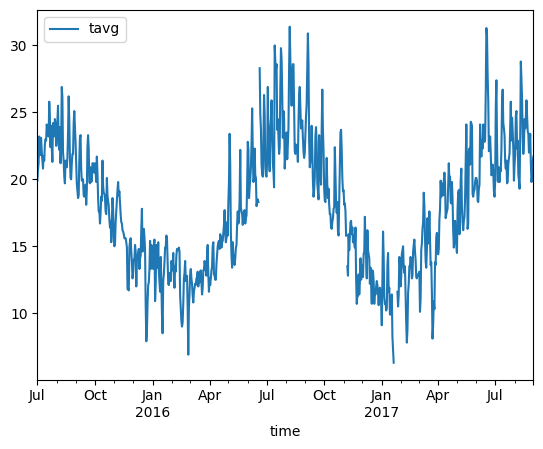

In [ ]:
# Import Meteostat library
import matplotlib.pyplot as plt

# Plot line chart including average, minimum and maximum temperature
weather_lisbon.plot(y=['tavg']) #, 'tmin', 'tmax'
plt.show()

In [ ]:
weather_lisbon

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2015-07-01,19.9,17.6,23.9,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,20.7,16.2,25.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,21.2,16.0,25.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,23.2,19.2,28.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,21.8,17.8,26.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,22.8,16.9,30.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,23.1,18.4,29.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,22.1,17.6,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,21.4,17.2,26.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN




> Um einen Überblick über die Wetterdaten zu erhalten, können diese außerdem in einem Dataframe und mit `describe()` die wichtigsten statistischen Daten ausgegeben werden.



In [ ]:
weather_lisbon.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,786.000000,793.000000,793.000000,793.000000,7.000000,0.0,0.0,0.0,0.0,0.0
mean,18.032697,14.404540,22.453594,1.655738,11.428571,NaN,NaN,NaN,NaN,NaN
std,4.782786,4.093664,5.871384,4.875469,3.779645,NaN,NaN,NaN,NaN,NaN
min,6.300000,3.100000,9.200000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN
25%,14.100000,11.200000,17.300000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,18.100000,14.800000,22.100000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,21.700000,17.600000,27.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN
max,31.400000,27.400000,39.400000,46.400000,20.000000,NaN,NaN,NaN,NaN,NaN




> Um später Bereinigungen und Analysen zu vereinfachen, muss an dieser Stelle der Index, der momentan als Datum definiert ist, zurückgesetzt werden. So kann später einfach über die Standard-Indexierung [0:...] auf einzelne Zeilen zugergiffen werden.

In [ ]:
weather_lisbon = weather_lisbon.reset_index()



> Außerdem muss innerhalb der Daten kenntlich gemacht werden, dass dies die Wetterdaten von Lissabon sind. Hierfür fügen wir eine neue Spalte 'city' ein, die wir für den kompletten Datensatz mit 'Lisbon' füllen. Wird dieser Datensatz dann mit einem anderen Wetterdatensatz gejoint bleibt kenntlich, welche Daten sich auf welchen Ort beziehen.



In [ ]:
weather_lisbon.insert(loc=0, column='city', value ='Lisbon')
weather_lisbon

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Lisbon,2015-07-01,19.9,17.6,23.9,2.3,NaN,NaN,NaN,NaN,NaN,NaN
1,Lisbon,2015-07-02,20.7,16.2,25.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Lisbon,2015-07-03,21.2,16.0,25.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Lisbon,2015-07-04,23.2,19.2,28.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Lisbon,2015-07-05,21.8,17.8,26.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Lisbon,2015-07-06,22.8,16.9,30.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Lisbon,2015-07-07,23.1,18.4,29.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Lisbon,2015-07-08,22.1,17.6,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Lisbon,2015-07-09,21.4,17.2,26.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Lisbon,2015-07-10,20.8,17.8,25.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN



> Da die der Wetterdatensatz für Lissabon dem Hoteldatensatz hinzugefügt werden soll, soll auch dieser noch auf Vollständigkeit und Qualität geprüft werden.

> Dies geschieht, wie auch schon beim Hoteldatensatz beschrieben, durch die Funktion `isna()`, deren Ergebnisse durch die Funktion `sum()` addiert werden und die Gesamtzahl ausgeben. Der Vollständigkeithalber sollen die fehlenden Werte ebenfalls im Verhältnis zur Gesamtzahl der Erhebungen angezeigt werden.

> Die Spalten 'snow', 'wdir', 'wspd', 'wpgt', 'pres' und 'tsun' werden aufgrund der vielen Missing Values im späteren Verlauf, nachdem die Wetterdatensätze zusammengeführt wurden, gelöscht werden.

In [ ]:
# print sum of missing values per column
weather_lisbon.isna().sum()

city      0
time      0
tavg      7
tmin      0
tmax      0
prcp      0
snow    786
wdir    793
wspd    793
wpgt    793
pres    793
tsun    793
dtype: int64

In [ ]:
# print percentage of missing values per column
(weather_lisbon.isna().sum()/len(weather_lisbon)).apply('{0:.4%}'.format)

city      0.0000%
time      0.0000%
tavg      0.8827%
tmin      0.0000%
tmax      0.0000%
prcp      0.0000%
snow     99.1173%
wdir    100.0000%
wspd    100.0000%
wpgt    100.0000%
pres    100.0000%
tsun    100.0000%
dtype: object

### **Wetterdaten Faro**



> Wie bei den Wetterdaten für Lissabon, kann mit `Stations()`-Funktion eine Wetterstation in der Algarve ermitteln. Als Koordinaten, in deren Nähe die Station liegen soll, werden die von Faro, der Hauptstadt der Algarve angegeben. Die ermittelte Station liegt somit in der Nähe von Faro und wird unter 'station_faro' gespeichert.



In [ ]:
# get data of a weather station located in the algarve
station_faro = stations.nearby(37.0187, -7.9272)
station_faro = station_faro.fetch(1)

print(station_faro)

                   name country region    wmo  icao  latitude  longitude  \
id                                                                         
08554  Faro / Aeroporto      PT     FA  08554  LPFR   37.0167    -7.9667   

       elevation       timezone hourly_start hourly_end daily_start  \
id                                                                    
08554        7.0  Europe/Lisbon   1948-01-11 2023-06-12  1973-01-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
08554 2022-09-28    1973-01-01  2022-01-01  3513.994047  




> Es kann nun wieder die gewünschte Station und der gewünschte Zeitraum in die `Daily()`-Funktion gegeben und die entsprechenden Wetterdaten eingeholt und geplottet werden.



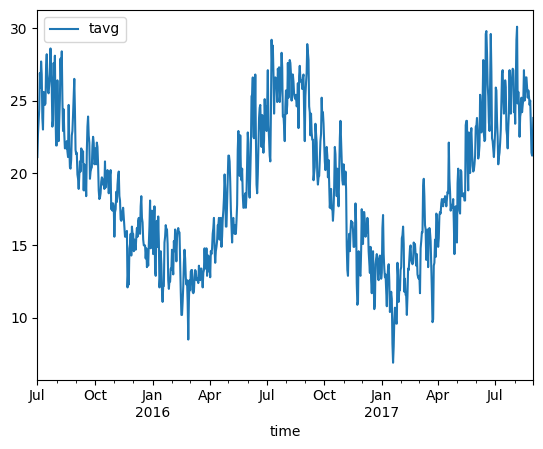

In [ ]:
# Get daily data
weather_faro = Daily('08554', start, end)
weather_faro = weather_faro.fetch()

# Plot line chart including average, minimum and maximum temperature
weather_faro.plot(y=['tavg']) #, 'tmin', 'tmax'
plt.show()



> Auch ein Überblick über die grundlegenden statischtischen Kennzahlen der Wetterdaten in Faro kann mit `describe()` ausgegeben werden.



In [ ]:
weather_faro.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,793.000000,790.000000,789.000000,196.000000,16.00,754.000000,788.000000,0.0,786.000000,0.0
mean,19.079950,15.596835,22.950824,4.276531,13.75,202.497347,13.870178,NaN,1018.553435,NaN
std,4.879822,4.864647,5.472561,9.562735,5.00,110.627850,5.446339,NaN,5.622776,NaN
min,6.900000,3.000000,12.000000,0.000000,10.00,0.000000,4.400000,NaN,995.400000,NaN
25%,15.000000,11.700000,18.200000,0.000000,10.00,79.000000,9.875000,NaN,1015.200000,NaN
50%,18.700000,15.500000,22.000000,0.300000,10.00,259.500000,12.900000,NaN,1017.500000,NaN
75%,23.000000,19.400000,27.500000,4.100000,20.00,296.000000,17.100000,NaN,1021.500000,NaN
max,30.100000,27.000000,37.200000,87.100000,20.00,359.000000,44.600000,NaN,1035.400000,NaN




> Um zu prüfen, wie der Wetterdatensatz für Faro bereinigt werden muss, wird dieser durch Eingabe und Ausführen des Dataframe-Namens 'weather_faro' als Dataframe ausgegeben.



In [ ]:
weather_faro

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2015-07-01,21.1,17.0,24.9,NaN,NaN,304.0,15.5,NaN,1016.0,NaN
2015-07-02,22.7,17.9,28.4,NaN,NaN,290.0,14.4,NaN,1018.9,NaN
2015-07-03,23.6,19.2,26.9,NaN,NaN,NaN,12.5,NaN,1018.7,NaN
2015-07-04,24.4,17.9,29.2,NaN,NaN,295.0,10.2,NaN,1018.9,NaN
2015-07-05,26.9,22.8,29.9,NaN,NaN,283.0,11.4,NaN,1016.7,NaN
2015-07-06,25.9,22.5,29.4,NaN,NaN,NaN,9.9,NaN,1016.1,NaN
2015-07-07,27.7,21.9,32.4,NaN,NaN,303.0,9.2,NaN,1015.7,NaN
2015-07-08,26.8,22.9,29.7,NaN,NaN,285.0,12.2,NaN,1015.0,NaN
2015-07-09,23.8,21.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN




> Da der Datensatz momentan (wie bei dem für Lissabon auch schon) über das Datum indexiert ist, was später problematisch werden könnte, wird der Index über `reset_index()` zurückgesetzt. Die Änderung wird durch Ausgabe des Dataframes erneut überprüft.



In [ ]:
weather_faro = weather_faro.reset_index()
weather_faro

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015-07-01,21.1,17.0,24.9,NaN,NaN,304.0,15.5,NaN,1016.0,NaN
1,2015-07-02,22.7,17.9,28.4,NaN,NaN,290.0,14.4,NaN,1018.9,NaN
2,2015-07-03,23.6,19.2,26.9,NaN,NaN,NaN,12.5,NaN,1018.7,NaN
3,2015-07-04,24.4,17.9,29.2,NaN,NaN,295.0,10.2,NaN,1018.9,NaN
4,2015-07-05,26.9,22.8,29.9,NaN,NaN,283.0,11.4,NaN,1016.7,NaN
5,2015-07-06,25.9,22.5,29.4,NaN,NaN,NaN,9.9,NaN,1016.1,NaN
6,2015-07-07,27.7,21.9,32.4,NaN,NaN,303.0,9.2,NaN,1015.7,NaN
7,2015-07-08,26.8,22.9,29.7,NaN,NaN,285.0,12.2,NaN,1015.0,NaN
8,2015-07-09,23.8,21.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-07-10,23.0,18.2,31.2,NaN,NaN,267.0,11.0,NaN,1018.6,NaN




> Ebeneso muss der Stadtname 'Faro' wieder in einer neuen Spalte angefügt werden, um die Daten später noch zuordnen zu können.



In [ ]:
weather_faro.insert(loc=0, column='city', value ='Faro')
weather_faro

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Faro,2015-07-01,21.1,17.0,24.9,NaN,NaN,304.0,15.5,NaN,1016.0,NaN
1,Faro,2015-07-02,22.7,17.9,28.4,NaN,NaN,290.0,14.4,NaN,1018.9,NaN
2,Faro,2015-07-03,23.6,19.2,26.9,NaN,NaN,NaN,12.5,NaN,1018.7,NaN
3,Faro,2015-07-04,24.4,17.9,29.2,NaN,NaN,295.0,10.2,NaN,1018.9,NaN
4,Faro,2015-07-05,26.9,22.8,29.9,NaN,NaN,283.0,11.4,NaN,1016.7,NaN
5,Faro,2015-07-06,25.9,22.5,29.4,NaN,NaN,NaN,9.9,NaN,1016.1,NaN
6,Faro,2015-07-07,27.7,21.9,32.4,NaN,NaN,303.0,9.2,NaN,1015.7,NaN
7,Faro,2015-07-08,26.8,22.9,29.7,NaN,NaN,285.0,12.2,NaN,1015.0,NaN
8,Faro,2015-07-09,23.8,21.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Faro,2015-07-10,23.0,18.2,31.2,NaN,NaN,267.0,11.0,NaN,1018.6,NaN



> Nach Aufbereiten des Wetterdatensatzes für Faro, soll dieser ebenfalls noch auf Missing Values geprüft werden.

> Diese liegen hier vor allem in den Spalten 'prcp' mit ~75,3%, 'snow' mit ~98%, 'wpgt' mit 100% und 'tsun' mit 100% vor. Diese Spalten können, wie auch schon im Datensatz weather_lisbon beschrieben, gelöscht werden, da sie für das Projekt obsolet sind. Die Bereinigung dieser Variabeln folgt nach der Zusammenführung der Wetterdatensätze weiter unten.

In [ ]:
# print sum of missing values per column
weather_faro.isna().sum()

city      0
time      0
tavg      0
tmin      3
tmax      4
prcp    597
snow    777
wdir     39
wspd      5
wpgt    793
pres      7
tsun    793
dtype: int64

In [ ]:
# print percentage of missing values per column
(weather_faro.isna().sum()/len(weather_faro)).apply('{0:.4%}'.format)

city      0.0000%
time      0.0000%
tavg      0.0000%
tmin      0.3783%
tmax      0.5044%
prcp     75.2837%
snow     97.9823%
wdir      4.9180%
wspd      0.6305%
wpgt    100.0000%
pres      0.8827%
tsun    100.0000%
dtype: object



> Da auch bei dem Wetterdatensatz von Lissabon viele Werte in den Spalten 'snow', 'wpgt' und 'tsun' vorliegen, werden diese später aus dem zusammengeführten Datensatz gelöscht. Die 'prcp'-Spalte, in dem der Niederschlag aufgeführt ist, hat im Datensatz für Faro allerdings deutlich mehr fehlende Werte, als in dem für Lissabon. Dies muss überprüft werden.



> Eine erste Vermutung ist, dass die Werte '0,0' für eine sehr niedrige Niederschlagsmenge steht und die NaN-Werte wirklich KEIN Niederschlag repräsentieren können. Um dies zu prüfen, lassen wir uns weitere Nachkommastellen ausgeben. Selbst bei einer Erweiterung der Nachkommastellen auf 100, scheinen die 0,0-Daten nicht für sehr kleine Niederschlagsmengen zu stehen, außer, in Meteostat sind die Daten tatsächlich nur unter '0,0' hinterlegt (also nicht ganz korrekt) und eine Ausgabe weiterer Dezimalstellen verursacht lediglich, dass weitere Nullen angehängt werden. Dies wäre allerdings eine Theorie, die wir nicht selbst prüfen können und auch auf der Meteostat-Seite konnten wir dazu keine Informationen finden.





In [ ]:
pd.options.display.float_format = '{:.100f}'.format
weather_faro.prcp

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                                    NaN
7                                                    NaN
8     0.000000000000000000000000000000000000000000000...
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [ ]:
pd.options.display.float_format = '{:.2f}'.format



> Eine nächste Überlegung ist, die precipitation-Daten auf die Monate zu aggregieren, um diese Daten dann mit historischen Monatswerten zu vergleichen. Dafür wird die 'time'-Spalte des Datensatzes aufgeteilt, sodass Jahre und Monate seperat vorliegen. Diese können dann gruppiert und die Summen der Werte ausgegeben werden.


> Einige Werte, wie bespielsweise die prcp-Werte von Juni-September der einzelnen Jahre scheinen zu stimmen, auffällig ist allerdings, dass in 2015 im Dezember, 2016 im Januar, Februar, März und November, sowie in 2017 im Januar die Niederschlagswerte unterdurchschnittlich niedrig sind. Verglichen haben wir z.B. mit den Wetterdaten aus https://www.wetter.de/klima/europa/portugal/faro-s85540.html, https://www.klimatabelle.info/europa/portugal/algarve/faro und https://tcktcktck.org/portugal/faro.





In [ ]:
weather_faro['month']=weather_faro.time.astype(str).str[5:7]
weather_faro['year']=weather_faro.time.astype(str).str[:4]
weather_faro.groupby(by=['year','month']).agg(sum)

tavg   tmin   tmax   prcp  snow    wdir   wspd  wpgt     pres  \
year month                                                                   
2015 07    789.30 665.90 913.00   0.00  0.00 7710.00 382.20  0.00 30475.50   
     08    725.30 611.80 855.30   0.00  0.00 7410.00 419.60  0.00 31494.80   
     09    624.70 529.00 729.40   0.50  0.00 6578.00 374.60  0.00 30500.50   
     10    602.20 527.20 683.50 100.50  0.00 5224.00 392.30  0.00 31470.50   
     11    493.80 386.10 608.10 105.90  0.00 3818.00 347.20  0.00 30734.30   
     12    486.00 399.30 577.80  38.10  0.00 2945.00 407.90  0.00 30843.70   
2016 01    443.40 353.80 530.40  24.90  0.00 5525.00 423.90  0.00 31767.50   
     02    388.60 294.90 486.90  14.20  0.00 6936.00 498.00  0.00 29681.70   
     03    404.50 258.90 518.20   1.80  0.00 9037.00 367.90  0.00 30580.20   
     04    483.20 386.20 575.30  31.90  0.00 6861.00 414.70  0.00 30453.70   
     05    578.80 474.10 689.50  77.80  0.00 6785.00 526.00  0.00 31474.00   
     06    678.70 565.00 826.80   0.00  0.00 7459.00 461.40  0.00 30506.00   
     07    785.10 668.60 929.90   0.00  0.00 6377.00 404.90  0.00 31500.10   
     08    800.00 678.60 938.60   0.00  0.00 5686.00 413.10  0.00 30509.60   
     09    695.40 583.90 819.70   8.90  0.00 5666.00 370.90  0.00 30545.80   
     10    616.30 517.30 719.40  74.30 40.00 5703.00 401.10  0.00 31489.70   
     11    466.20 363.50 577.20  51.30 40.00 5759.00 415.90  0.00 30508.80   
     12    441.40 356.90 542.40  96.00 50.00 3613.00 459.70  0.00 31765.10   
2017 01    367.80 247.10 499.30  17.50 10.00 6057.00 358.80  0.00 31718.90   
     02    384.60 302.60 467.60  82.20 50.00 5259.00 384.90  0.00 28554.60   
     03    461.50 338.40 561.20  74.40 20.00 6401.00 471.60  0.00 29592.40   
     04    530.80 423.90 644.00  21.00 10.00 4884.00 494.70  0.00 30509.00   
     05    625.20 498.40 711.30  17.00  0.00 4761.00 474.20  0.00 30469.10   
     06    728.30 608.60 869.10   0.00  0.00 6170.00 461.70  0.00 30472.80   
     07    755.90 633.80 914.10   0.00  0.00 6631.00 422.90  0.00 31482.80   
     08    773.40 647.70 920.20   0.00  0.00 3428.00 379.60  0.00 31481.90   

            tsun  
year month        
2015 07     0.00  
     08     0.00  
     09     0.00  
     10     0.00  
     11     0.00  
     12     0.00  
2016 01     0.00  
     02     0.00  
     03     0.00  
     04     0.00  
     05     0.00  
     06     0.00  
     07     0.00  
     08     0.00  
     09     0.00  
     10     0.00  
     11     0.00  
     12     0.00  
2017 01     0.00  
     02     0.00  
     03     0.00  
     04     0.00  
     05     0.00  
     06     0.00  
     07     0.00  
     08     0.00

In [ ]:
weather_faro = weather_faro.drop(columns=['month', 'year'])
weather_faro

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Faro,2015-07-01,21.10,17.00,24.90,NaN,NaN,304.00,15.50,NaN,1016.00,NaN
1,Faro,2015-07-02,22.70,17.90,28.40,NaN,NaN,290.00,14.40,NaN,1018.90,NaN
2,Faro,2015-07-03,23.60,19.20,26.90,NaN,NaN,NaN,12.50,NaN,1018.70,NaN
3,Faro,2015-07-04,24.40,17.90,29.20,NaN,NaN,295.00,10.20,NaN,1018.90,NaN
4,Faro,2015-07-05,26.90,22.80,29.90,NaN,NaN,283.00,11.40,NaN,1016.70,NaN
5,Faro,2015-07-06,25.90,22.50,29.40,NaN,NaN,NaN,9.90,NaN,1016.10,NaN
6,Faro,2015-07-07,27.70,21.90,32.40,NaN,NaN,303.00,9.20,NaN,1015.70,NaN
7,Faro,2015-07-08,26.80,22.90,29.70,NaN,NaN,285.00,12.20,NaN,1015.00,NaN
8,Faro,2015-07-09,23.80,21.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Faro,2015-07-10,23.00,18.20,31.20,NaN,NaN,267.00,11.00,NaN,1018.60,NaN




> Eine andere Möglichkeit wäre nun, die Daten einer andere Station zu verwenden. Hierfür stünden die Stationen in den Küstenstädten Sagres (Algarve) oder (da es sonst in der Algarve keine weiteren Station hat) Huelva, in Spanien zu Verfügung. Wir testen für beide Stationen, ob hier die Werte besser sind.



In [ ]:
# get data of a weather station located in the algarve
station_sagres = stations.nearby(37.016829, -8.940593)
station_sagres = station_sagres.fetch(1)

print(station_sagres)

         name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                          
08538  Sagres      PT     FA  08538  <NA>     37.00      -8.95      25.00   

            timezone hourly_start hourly_end daily_start daily_end  \
id                                                                   
08538  Europe/Lisbon          NaT        NaT         NaT       NaT   

      monthly_start monthly_end  distance  
id                                         
08538           NaT         NaT   2049.26  


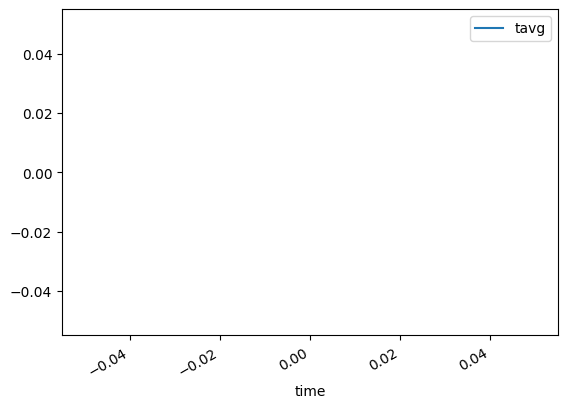

In [ ]:
# Get daily data
weather_sagres = Daily('08538', start, end)
weather_sagres = weather_sagres.fetch()

# Plot line chart including average, minimum and maximum temperature
weather_sagres.plot(y=['tavg']) #, 'tmin', 'tmax'
plt.show()

In [ ]:
weather_sagres.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
station_huelva = stations.nearby(37.261421, -6.9447224)
station_huelva = station_huelva.fetch(1)

print(station_huelva)

         name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                          
08383  Huelva      ES     AN  08383  <NA>     37.28      -6.92      20.00   

            timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                    
08383  Europe/Madrid          NaT        NaT  1920-01-01 2023-06-03   

      monthly_start monthly_end  distance  
id                                         
08383    1920-01-01  2021-01-01   3473.75  


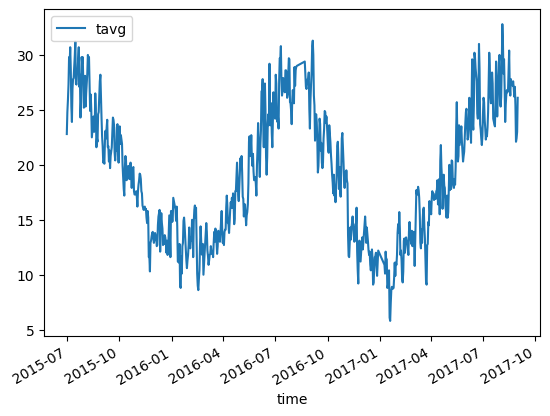

In [ ]:
# Get daily data
weather_huelva = Daily('08383', start, end)
weather_huelva = weather_huelva.fetch()

# Plot line chart including average, minimum and maximum temperature
weather_huelva.plot(y=['tavg']) #, 'tmin', 'tmax'
plt.show()

In [ ]:
weather_huelva.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,751.00,553.00,425.00,746.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,19.28,14.73,26.19,1.46,NaN,NaN,NaN,NaN,NaN,NaN
std,5.96,5.05,6.79,6.07,NaN,NaN,NaN,NaN,NaN,NaN
min,5.80,0.30,14.40,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,13.95,10.60,20.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,18.80,15.20,25.50,0.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,24.20,18.80,31.90,0.00,NaN,NaN,NaN,NaN,NaN,NaN
max,32.80,24.50,42.00,90.40,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather_huelva.isna().sum()

tavg      0
tmin    198
tmax    326
prcp      5
snow    751
wdir    751
wspd    751
wpgt    751
pres    751
tsun    751
dtype: int64



> Bei Huelva liegen bei tmin und tmax viele fehlende Werte vor (mehr als bei den Wetterdaten von Faro). Allerdings sind die prcp-Werte fast vollständig. Es wäre also möglich, die fehlenden prcp-Werte von Faro anstatt mit 0en mit den Werten von Huelva zu erstzen.


> Nach weiterer Recherche, zu der unter anderem die Entfernung von Huelva zu Faro sowie der Abgleich der durchschnittlichen Niederschlagswerte pro Monat gehört, entschieden wir uns dagegen, die prcp-Daten von Huelva zu verwenden. Zwar sind diese vollständiger, generell regnet es aber in Huevla durchschnittlich weniger als in Faro. ZUdem liegt Huelva ca. 110km von Faro, außerhalb der Algarve und sogar Portugals, nämlich an der spanischen Küste. Bei solch einer Entfernung befürchten wir eine Verschiebung in den Wetterdaten (möglicherweise sogar um einen ganzen Tag), was die Ergebnisse unserer Algorithmen verfälschen könnte. Deshalb erstzen wir nun die NaN-Werte der prcp-Spalte im Faro-Wetterdatensatz mit 0-Werten in der Annahme, dass NaN tatsächlich für keinen Niederschlag steht.





In [ ]:
weather_faro['prcp'] = weather_faro['prcp'].fillna(0)
weather_faro

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Faro,2015-07-01,21.10,17.00,24.90,0.00,NaN,304.00,15.50,NaN,1016.00,NaN
1,Faro,2015-07-02,22.70,17.90,28.40,0.00,NaN,290.00,14.40,NaN,1018.90,NaN
2,Faro,2015-07-03,23.60,19.20,26.90,0.00,NaN,NaN,12.50,NaN,1018.70,NaN
3,Faro,2015-07-04,24.40,17.90,29.20,0.00,NaN,295.00,10.20,NaN,1018.90,NaN
4,Faro,2015-07-05,26.90,22.80,29.90,0.00,NaN,283.00,11.40,NaN,1016.70,NaN
5,Faro,2015-07-06,25.90,22.50,29.40,0.00,NaN,NaN,9.90,NaN,1016.10,NaN
6,Faro,2015-07-07,27.70,21.90,32.40,0.00,NaN,303.00,9.20,NaN,1015.70,NaN
7,Faro,2015-07-08,26.80,22.90,29.70,0.00,NaN,285.00,12.20,NaN,1015.00,NaN
8,Faro,2015-07-09,23.80,21.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Faro,2015-07-10,23.00,18.20,31.20,0.00,NaN,267.00,11.00,NaN,1018.60,NaN


In [ ]:
weather_faro

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Faro,2015-07-01,21.10,17.00,24.90,0.00,NaN,304.00,15.50,NaN,1016.00,NaN
1,Faro,2015-07-02,22.70,17.90,28.40,0.00,NaN,290.00,14.40,NaN,1018.90,NaN
2,Faro,2015-07-03,23.60,19.20,26.90,0.00,NaN,NaN,12.50,NaN,1018.70,NaN
3,Faro,2015-07-04,24.40,17.90,29.20,0.00,NaN,295.00,10.20,NaN,1018.90,NaN
4,Faro,2015-07-05,26.90,22.80,29.90,0.00,NaN,283.00,11.40,NaN,1016.70,NaN
5,Faro,2015-07-06,25.90,22.50,29.40,0.00,NaN,NaN,9.90,NaN,1016.10,NaN
6,Faro,2015-07-07,27.70,21.90,32.40,0.00,NaN,303.00,9.20,NaN,1015.70,NaN
7,Faro,2015-07-08,26.80,22.90,29.70,0.00,NaN,285.00,12.20,NaN,1015.00,NaN
8,Faro,2015-07-09,23.80,21.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Faro,2015-07-10,23.00,18.20,31.20,0.00,NaN,267.00,11.00,NaN,1018.60,NaN


### **Zusammenführen der Wetterdatensätze**



> Es können nun die beiden vorbereiteten Datensätze mithilfe der pandas-Funktion `concat()` untereinander zusammengeführt werden. Die Daten werden untereinander vereint, da in beiden Datensätzen die Spaltennamen identisch sind.



In [ ]:
weather = pd.concat([weather_lisbon, weather_faro])
weather

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,Lisbon,2015-07-01,19.90,17.60,23.90,2.30,NaN,NaN,NaN,NaN,NaN,NaN
1,Lisbon,2015-07-02,20.70,16.20,25.80,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Lisbon,2015-07-03,21.20,16.00,25.80,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Lisbon,2015-07-04,23.20,19.20,28.50,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Lisbon,2015-07-05,21.80,17.80,26.90,0.00,NaN,NaN,NaN,NaN,NaN,NaN
5,Lisbon,2015-07-06,22.80,16.90,30.20,0.00,NaN,NaN,NaN,NaN,NaN,NaN
6,Lisbon,2015-07-07,23.10,18.40,29.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
7,Lisbon,2015-07-08,22.10,17.60,28.20,0.00,NaN,NaN,NaN,NaN,NaN,NaN
8,Lisbon,2015-07-09,21.40,17.20,26.90,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Lisbon,2015-07-10,20.80,17.80,25.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN




> Da für die Vorhersage von Buchundsstornierungen und der Auslastung der Hotels Angaben wie Schnee, Wind und Luftdruck eine vernachlässigbare Rolle spielen und der Wetter-Datensatz für Lissabon in diesen Spalten viele NaN-Values hat (diese Daten also nicht vorhanden sind), können die entsprechenden Spalten über die '`drop()`'-Funktion gelöscht werden.



In [ ]:
weather = weather.drop(columns=['wdir', 'wspd', 'pres', 'snow', 'wpgt', 'tsun'])

## **Zusammenführen der konkatenierten Wetterdatensätze und des Hoteldatensatzes**



> Sobald die Wetterdatensätze zusammengeführt und irrelevante Spalten entfernt wurden, können diese datensätze mit dem Hoteldatensatz zusammengeführt werden. Dabei gilt beim Hoteldatensatz (left) die Spalte 'arrival_date', beim kombinierten Wetterdatensatz die Spalte 'time' als Indikator für das Verbinden der richtigen Wetterdaten mit der passenden Hotelbuchungen. Fehlen Wetterdaten zu den Hotelbuchungen, so werden die Hotelbuchungen trotzdem aufgeführt, die fehlenden Daten allerdings durch 'NaN' ersetzt (argument: how='left').



In [ ]:
hotel_and_weather = pd.merge(hotel_orig, weather, left_on='arrival_date', right_on='time', how='left')
hotel_and_weather

,night_index,hotel,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city,time,tavg,tmin,tmax,prcp
0,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Lisbon,2015-07-01,19.90,17.60,23.90,2.30
1,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,2015-07-01,21.10,17.00,24.90,0.00
2,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Lisbon,2015-07-01,19.90,17.60,23.90,2.30
3,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,2015-07-01,21.10,17.00,24.90,0.00
4,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Lisbon,2015-07-01,19.90,17.60,23.90,2.30
5,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,2015-07-01,21.10,17.00,24.90,0.00
6,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,Transient,75.00,0,0,Check-Out,2015-07-02,Lisbon,2015-07-01,19.90,17.60,23.90,2.30
7,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,2015-07-01,21.10,17.00,24.90,0.00
8,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Lisbon,2015-07-01,19.90,17.60,23.90,2.30
9,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,2015-07-01,21.10,17.00,24.90,0.00




> Durch Ausgeben des zusammengeführten Datensatzes wird jedoch deutlich, dass sich die Anzahl der Einträge verdoppelt hat. Dies liegt daran, dass Wetterdaten für jeden Tag sowohl für Lissabon, als auch für Faro vorliegen. Durch das Anwenden der `merge()`-Funktion wurden nun zu jedem 'Arrival-Date' die Wetterdaten beider Städte hinzugefügt. Um dies zu beheben, werden nun die Zeilen gesucht, in denen sowohl 'Resort Hotel' als auch 'Faro' vorhanden sind (da laut der Dokumentation des Datensatzes das Resort Hotel in der Algarve liegt) ODER das Hotel ein 'City Hotel' ist und mit den Wetterdaten von 'Lissabon' verbunden wurden. Durch das Angeben der unter 'condition' gespeicherten Bedingungen in eckigen Klammern [] nach dem Dataframe-Namen, werden ebendiese Reihe gefiltert und ausgegeben.



In [ ]:
condition = ((hotel_and_weather['hotel'] == 'Resort Hotel') & (hotel_and_weather['city'] == 'Faro') |
               (hotel_and_weather['hotel'] == 'City Hotel') & (hotel_and_weather['city'] == 'Lisbon'))

hotel_and_weather_filtered = hotel_and_weather[condition]
hotel_and_weather_filtered

,night_index,hotel,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city,time,tavg,tmin,tmax,prcp
1,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,2015-07-01,21.10,17.00,24.90,0.00
3,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,2015-07-01,21.10,17.00,24.90,0.00
5,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,2015-07-01,21.10,17.00,24.90,0.00
7,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,2015-07-01,21.10,17.00,24.90,0.00
9,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,2015-07-01,21.10,17.00,24.90,0.00
11,5,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,2015-07-01,21.10,17.00,24.90,0.00
13,6,Resort Hotel,0,0,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Faro,2015-07-01,21.10,17.00,24.90,0.00
15,7,Resort Hotel,0,9,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,1,0,Transient,103.00,0,1,Check-Out,2015-07-03,Faro,2015-07-01,21.10,17.00,24.90,0.00
17,8,Resort Hotel,1,85,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,82.00,0,1,Canceled,2015-05-06,Faro,2015-07-01,21.10,17.00,24.90,0.00
19,9,Resort Hotel,1,75,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,1,0,Transient,105.50,0,0,Canceled,2015-04-22,Faro,2015-07-01,21.10,17.00,24.90,0.00




> Nun müssem erneut die Indices zurückgesetzt werden, da diese nicht in aufsteigender Reihenfolge vergeben sind (da Zeilen gestrichen wurden). Die Spalte, die unter 'index' aufgeführt ist doppelt sich und auch die Spalte 'time', über die die Wetterdaten mit den Hoteldaten verbundden wurde, liegt doppelt vor. Diese beiden Spalten können nun entfernt werden.



In [ ]:
hotel_and_weather_filtered = hotel_and_weather_filtered.reset_index()
hotel_and_weather_filtered = hotel_and_weather_filtered.drop(columns = ['index', 'time'])
hotel_and_weather_filtered

,night_index,hotel,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city,tavg,tmin,tmax,prcp
0,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,21.10,17.00,24.90,0.00
1,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,21.10,17.00,24.90,0.00
2,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,21.10,17.00,24.90,0.00
3,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,21.10,17.00,24.90,0.00
4,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00
5,5,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00
6,6,Resort Hotel,0,0,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00
7,7,Resort Hotel,0,9,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,1,0,Transient,103.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00
8,8,Resort Hotel,1,85,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,82.00,0,1,Canceled,2015-05-06,Faro,21.10,17.00,24.90,0.00
9,9,Resort Hotel,1,75,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,1,0,Transient,105.50,0,0,Canceled,2015-04-22,Faro,21.10,17.00,24.90,0.00


> Da für weitere Analysen jeweils ausreicht zu wissen, wie die durchschnittliche Mindest- und Höchsttemperatur, die Temperatur im aritmetischen Mittel und der durchschnittliche Niederschlag im Buchungszeitraum aussieht, sollen diese Durchschnitsswerte nun in einem Dataframe zusammengefasst werden.

> Dafür wird zuerst eine leere Liste (= holidaaverage_weathery_flag) erstellt. Für jeden Index bzw. jede Zeile der hotel_and_weather_filtered (also jede Beobachtung) kann nun iteriert und geprüft werden, ob die Condition (=filtered_df), dass die Wetterdaten sich auf das Datum nach der Ankunft und vor der Abfahrt sowie der entsprechenden Stadt bezieht.

> Nach Anwenden der 'Filterung' auf die einzelnen Reihen, können nun die einzelnen arithmetischen Mittelwerte für die tagesdurchschnittliche Temperatur, die Mindest- und Höchstetemperaturen und den Niederschlag über den Buchungszeitraum hinweg berechnet werden.
Diese Daten werden einzeln als Variablen gespeichert und jeweils inklusive der Städtenamen in der average_weather-Liste angehängt.

>Zum Schluss kann die average_weather-Liste in eine Dataframe transformiert werden.

In [ ]:
average_weather = []

# Durchschnittliche Wetterdaten pro Stadt im betrachteten Zeitraum berechnen
for index, row in hotel_and_weather_filtered.iterrows():
    city = row['city']
    arrival = row['arrival_date']
    departure = row['departure_date']

    filtered_df = weather[(weather['city'] == city) & (weather['time'] >= arrival) & (weather['time'] <= departure)]
    average_temp = filtered_df['tavg'].mean()
    average_tmin = filtered_df['tmin'].mean()
    average_tmax = filtered_df['tmax'].mean()
    average_prcp = filtered_df['prcp'].mean()


    average_weather.append({
        'city': city,
        'average_temperature': average_temp,
        'average_temp_min': average_tmin,
        'average_temp_max': average_tmax,
        'average_prcp': average_prcp,

    })

average_weather_df = pd.DataFrame(average_weather)



> Um den average_weather-Datensatz mit dem hotel_and_weather-Datensatz zu joinen benötigen wir nun noch die night_index-Spalte, um den Join der beiden Datensätze über diese identische Spalte zu ermöglichen.

> Dazu wird in den Dataframe 'average_wather' die neue Spalte 'night_index' eingefügtund durch die `range()`-Funktion, die eine aufsteigende Zahlenfolge von 0 bis zur Länge von stay_dates, über `len() `ermittelt, befüllt. Somit wird den Reihen von average_weather in der 'night_index'-Spalte die Werte 0-(len(stay_dates)-1) zugewiesen.





In [ ]:
average_weather_df['night_index'] = range(len(average_weather_df))
average_weather_df.loc[:, 'night_index'] = range(len(average_weather_df))

> Nun können die beiden Datensätze über `pd.merge()` miteinander gejoint werden.

In [ ]:
hotel_and_weather_filtered = pd.merge(hotel_and_weather_filtered, average_weather_df, on='night_index')

> Zuletzt können die Spalten 'city_x', 'tavg', 'tmin', 'tmax' und 'recp' durch die Funktion `drop()` entfernt werden, da diese nur zur Herleitung der relevanten Werte benötigt wurden.

In [ ]:
hotel_and_weather_filtered = hotel_and_weather_filtered.rename(columns={'city_y': 'city'})

> Zur Überprüfung, ob die Conditions bis zu diesem Punkt korrekt umgesetzt wurden und die gewünschten Ergebnisse liefern bzw. die Wetterdaten richtig zugeordnet sind, wird nun mit `nunique()` überprüft, wie viele einzigartige Werte pro Spalte vorliegen.

In [ ]:
hotel_and_weather_filtered.nunique()

night_index                       111612
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date                         793
departure_date                       806
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               15
stays_in_week_nights                  31
stay_nights_sum                       39
adults                                14
children                               5
babies                                 5
meal                                   5
country                              176
market_segment                         7
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        28
reserved_room_type                     9
assigned_room_ty

# **Joinen mit Feiertagen**

## **Vorbereitung des Holiday-Datensatzes**



> Da die Vermutung naheliegt, dass es einen Einfluss auf Buchungen und Cancellations haben kann, ob der Buchungszeitraum an einem Feiertag liegt, wollen wir den kombinierten hotel_and_weather_filtered-Datensatz mit Daten zu nationalen Feiertagen zusammenführen.
Um zu ermitteln, welche Form die Werte der Spalte 'country' annehmen, um einen Join zu ermöglichen, schauen wir, in welcher Form die countries im hotel-and-weather-Datensatz vorliegen. Dies erreichen wir über die `unique()`-Funktion, die auf die country-Spalte angewendet wird. Diese einzeln vorliegenden Werte können wir dann mit `print()` ausgeben. Wir sehen, dass die Länder in Alpha 3-Codes vorliegen.



In [ ]:
unique_countries = hotel_and_weather_filtered['country'].unique()
print(unique_countries)

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'FRA'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR' 'CYM'
 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG'
 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA'
 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC' 'AZE'
 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH'
 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM'
 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL' 'BHS'
 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM' 'MCO'
 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP' 'KEN'
 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI' 'NAM'
 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA' 'PYF' 'GU



> Aus dem package 'datetime' muss 'date' importiert werden, um später das Datum im Holiday-Datensatz im gewünschten Format ausgeben zu können. Zudem wird das Paket 'holidays' importiert, welche die Feiertage aller relevanten Länder beinhaltet.



In [ ]:
from datetime import date
import holidays



> Um jeweils das Datum der Feiertage in Deutschland für die einzelnen Jahre zu erhalten, wird eine leere Liste ('holiday_list') erstellt. Über eine for-Loop werden dafür für die einzelnen Feiertage in Deutschland* im Datensatz holidays aus den Jahren 2015, 2016 und 2017 gezogen. Dies geschieht über die condition 'years= 2015,2016, 2017'. Mit der Funktion `items()`, die Tuples aus den entsprechenden Feiertagen mit dem jeweiligen Datum erstellt.


> Diese Liste mit Tuples wird dann in ein Dataframe umgewandelt, mit den Spalten 'date' und 'holiday' versehen und das Dataframe unter 'holidays_df' gespeichert.

> Nach Erstellen dieses Dataframes wird es ausgegeben um einen Qualitätscheck zu machen. Deswegen wurden hier auch die deutschen Feiertage verwendet um die Überprüfung einfach zu gestatlten.

'*  Hier wurden nur die Feiertage verwendet, die in ganz Deutschland einheitlich sind. Dies bedeutet, dass bundeslandspezifische Feiertage nicht berücksichtigt werden.


> Nun brauchen wir noch ein Dataframe aller Feiertage mit den entsprechenden Länderkürzeln, um die beiden Datensätze joinen zu können. Dennoch dient der Code als Ansatz, für alle Länder inklusive der Länderkürzel die entsprechenden Feiertage zu bekommen.



In [ ]:
holiday_list = []
for holiday in holidays.Germany(years=[2015,2016,2017]).items():
  holiday_list.append(holiday)

holidays_df = pd.DataFrame(holiday_list, columns=['date', 'holiday'])
holidays_df

,date,holiday
0,2016-01-01,New Year's Day
1,2016-03-25,Good Friday
2,2016-03-28,Easter Monday
3,2016-05-01,Labor Day
4,2016-05-05,Ascension Day
5,2016-05-16,Whit Monday
6,2016-10-03,German Unity Day
7,2016-12-25,Christmas Day
8,2016-12-26,Second Day of Christmas
9,2017-01-01,New Year's Day




> Dafür werden über die Funktion `list_supported_countries()`, die auf dem holiday-Datensatz angewendet wird, alle Ländercodes des holidays-packages, unter 'all_country_codes' gespeichert.

> Nun wird eine leere Liste 'holiday_list' erstellt, in der die Informationen, die durch zwei verschachtelte for-Loops ermittelt werden, abgelegt werden können.

> In einer ersten for-Loop wird angestoßen, dass für jedes einzelne Länderkürzel der ermittelten 'all_country_codes' ein bestimmter Befehl durchgeführt wird. Dieser Befehl ist, für den Countrycode des entsprechenden Landes die Feiertag-Daten aus den Jahren 2015-2017 zu ziehen*. Dafür wird im holidays-Datensatz in der Spalte 'CountryHoliday' unter der Bedingung, dass der Countrycode übereinstimmt und der Tag zwischen 2015 und 2017 liegt, das entsprechende Datum ermittelt und unter holiday_dates gespeichert.

> Innerhalb dieser holiday_dates-Tuples wird dann pro Datum und Feiertagname das Länderkürzel und entsprechende Datum an die leere holiday_list gehängt.



> Sobald all diese Daten und Codes in der Liste gesammelt sind, werden diese unter den Spalten 'country_code' und 'date' als Dataframe mit dem Namen 'holidays_df' gespeichert. Dieses kann dann zur Überprüfung ausgegeben werden.

'*  Für Deutschland wurden auch hier nur die Feiertage verwendet, die in ganz Deutschland einheitlich sind. Bundeslandspezifische Feiertage werden deshalb nicht berücksichtigt.










In [ ]:
# Get a list of all available country codes
all_country_codes = holidays.list_supported_countries()

# Create an empty list to store holiday information
holiday_list = []

# Loop through each country code and append its holiday information to the list
for code in all_country_codes:
    # Retrieve the holiday dates for the country and year range
    holiday_dates = holidays.CountryHoliday(code, years=[2015, 2016, 2017])

    # Loop through each holiday date and append the country name and date to the list
    for date, name in holiday_dates.items():
        holiday_list.append((code, date))


holidays_df = pd.DataFrame(holiday_list, columns=['country_code', 'date'])
holidays_df

,country_code,date
0,AL,2016-01-01
1,AL,2016-01-02
2,AL,2016-03-14
3,AL,2016-03-22
4,AL,2016-03-27
5,AL,2016-05-01
6,AL,2016-10-19
7,AL,2016-11-28
8,AL,2016-11-29
9,AL,2016-12-08




> Mit der Funktion `.dtype` kann dann der Datentyp der Spalte 'date' im 'holiday_df' ermittelt werden.



In [ ]:
print(holidays_df['date'].dtype)

object




> Nun kann durch `pd.to_datetime` die date-Spalte in das gewünschte Format (yyyy-mm-dd) gebracht werden. Durch speichern unter dem gleichen Namen, wird das Dataframe aktualisiert abgespeichert.



In [ ]:
holidays_df['date'] = pd.to_datetime(holidays_df['date']) # date Spalte zu datetime format


> Durch erstellen einer Maske, die aus zwei mit einem 'and' verbundenen Conditions besteht, kann sichergestellt werden, dass nur Feiertage im Dataframe enthalten bleiben, die innerhalb der gewünschten Zeitperiode liegen. Diese Zeitperiode wurde bereits bei der Vorbereitung der Wetterdatensätze erstellt (und unter 'start' und 'end' gespeichert) und kann hier wiederverwendet werden.



In [ ]:
mask = (holidays_df['date'] >= start) & (holidays_df['date'] <= end)
holidays_df = holidays_df.loc[mask]
holidays_df

,country_code,date
0,AL,2016-01-01
1,AL,2016-01-02
2,AL,2016-03-14
3,AL,2016-03-22
4,AL,2016-03-27
5,AL,2016-05-01
6,AL,2016-10-19
7,AL,2016-11-28
8,AL,2016-11-29
9,AL,2016-12-08




> Die Datensätze können allerdings immer noch nicht gejoint werden, da im holiday_and_weather-Datensatz die Daten in einem Alpha 3-Code vorliegen, im holidays-Datensatz ist es ein Alpha 2-Code. Dies muss also angeglichen werden.
Dafür benötigen wir den 'country_converter', der installiert und als 'coco' importiert wird.



In [ ]:
pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import country_converter as coco



> Für eine Umwandlung von Alpha 2- in Alpha 3-Codes, wird eine Liste der Länderkürzel benötigt. Dafür erstellen wir über die Funktion `tolist()` eine Liste aller im holidays-Datensatz in der Spalte 'country_code' enthaltenen Werte eine Liste.



In [ ]:
code_list = holidays_df['country_code'].tolist()
print(code_list)

['AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'DZ', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AS', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AO', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR


> Als 'alpha3' kann mit dem country_converter und der Funktion `convert()` die in der code_list enthaltenen Länderkürzel in das ISO3-Format gebracht werden, und haben somit 3 Buchstaben im Kürzel. Über den Parameter 'not_found=None' wird definiert, dass für nicht gefundene Werte das Originalkürzel beibehalten wird.



In [ ]:
alpha3 = coco.convert(names=code_list, to='ISO3', not_found=None)
print(alpha3)

['ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'ASM', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AND', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO', 'AGO'



> Die als 'alpha3' gespeicherten Länderkürzel werden nun als neue Spalte 'alpha3_code' dem holidays-Dataframe angehängt. Das holidays-Dataframe hat nun die drei Spalte 'date', 'country_code' und 'alpha3_code' und kann auch so ausgegeben werden.



In [ ]:
holidays_df['alpha3_code'] = alpha3
holidays_df = holidays_df[['date', 'country_code', 'alpha3_code']]
holidays_df

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,country_code,alpha3_code
0,2016-01-01,AL,ALB
1,2016-01-02,AL,ALB
2,2016-03-14,AL,ALB
3,2016-03-22,AL,ALB
4,2016-03-27,AL,ALB
5,2016-05-01,AL,ALB
6,2016-10-19,AL,ALB
7,2016-11-28,AL,ALB
8,2016-11-29,AL,ALB
9,2016-12-08,AL,ALB


> Durch die Funktion '`nunique()`' kann nun ermittelt werden, wie viele unterschiedlichen Antworten gegeben wurden. Da die Daten sich auf zwei verschiedene Hotels beziehen, gibt es in der Spalte 'hotel' nur zwei unterschiedliche Werte unter allen Beobachtungen.

In [ ]:
hotel_orig.nunique()

night_index                       111612
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date                         793
departure_date                       806
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               15
stays_in_week_nights                  31
stay_nights_sum                       39
adults                                14
children                               5
babies                                 5
meal                                   5
country                              176
market_segment                         7
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        28
reserved_room_type                     9
assigned_room_ty



> Da das Joinen des holidays-Datensatzes zum holiday_and_weather-Datensatz dazu führen soll, dass ein Abgleich möglich ist, ob Buchungen an/um Feiertage(n) liegen, müssen die Ankunfts- und Abreisdaten aus dem hotel-Datensatz extrahiert werden. Dies geschieht durch das Speichern der einzelnen Spalten 'arrival_date', 'depature_date' und 'country' unter dem Variablennamem 'stay_dates'


In [ ]:
stay_dates = hotel_orig[['arrival_date', 'departure_date', 'country']]
stay_dates

,arrival_date,departure_date,country
0,2015-07-01,2015-07-01,PRT
1,2015-07-01,2015-07-01,PRT
2,2015-07-01,2015-07-02,GBR
3,2015-07-01,2015-07-02,GBR
4,2015-07-01,2015-07-03,GBR
5,2015-07-01,2015-07-03,GBR
6,2015-07-01,2015-07-03,PRT
7,2015-07-01,2015-07-03,PRT
8,2015-07-01,2015-07-04,PRT
9,2015-07-01,2015-07-04,PRT




> Da für weitere Analysen ausreicht zu wissen, ob sich der Buchungszeitraum mit einem oder mehreren Feiertagen überschneidet, genüg eine Angabe mit 0- und 1-Werten (=Holiday-Flag).

> Für die Holiday-Flags wird zuerst eine leere Liste (= holiday_flag) erstellt. Für jeden Index bzw. jede Zeile der stay_dates kann nun iteriert und geprüft werden, ob die Condition (=mask), dass ein Feiertag des holidays-Dataframe nach dem Datum der Ankunft und vor der Abfahrt aus stay_dates liegt. Die Condition beinhaltet außerdem, dass das Länderkürzel in stay_dates mit dem in holidays_df übereinstimmt, die Feiertage also wirklich die des jeweiligen Landes sind.

> Nach Anwenden der Maske auf die einzelnen Reihen in stay_dates, kann durch die `len()`-Funktion die Anzahl der Feiertage bestimmt werden, die sich mit dem Buchungszeitraum überschneiden. Diese Anzahl wird unter 'nmbr_holidays' gespeichert.

> Nun kann geprüft werden, ob die Anzahl der Feiertage, die sich mit dem Buchungszeitraum überschneiden, größer als null ist. Ist dies der Fall (überschneidet sich der Buchungszeitraum also mit einem Feiertag), wird in einer neuangefügten Spalte 'holiday_flag' im stay_dates-Dataframe eine Flag (=1) gesetzt. Alle anderen Buchungszeiträume erhalten keine Holiday-Flag.









In [ ]:
holiday_flag = []

for index, row in stay_dates.iterrows():
  arrival_date = row['arrival_date']
  departure_date = row['departure_date']
  country = row['country']

  mask = (holidays_df['date'] >= arrival_date) & (holidays_df['date'] <= departure_date) & (holidays_df['alpha3_code'] == country)

  nmbr_holidays = len(holidays_df[mask])

  if nmbr_holidays > 0:
    holiday_flag.append(1)
  else:
    holiday_flag.append(0)

stay_dates['holiday_flag'] = holiday_flag
stay_dates

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,arrival_date,departure_date,country,holiday_flag
0,2015-07-01,2015-07-01,PRT,0
1,2015-07-01,2015-07-01,PRT,0
2,2015-07-01,2015-07-02,GBR,0
3,2015-07-01,2015-07-02,GBR,0
4,2015-07-01,2015-07-03,GBR,0
5,2015-07-01,2015-07-03,GBR,0
6,2015-07-01,2015-07-03,PRT,0
7,2015-07-01,2015-07-03,PRT,0
8,2015-07-01,2015-07-04,PRT,0
9,2015-07-01,2015-07-04,PRT,0


> Mit der Funktion '`value_counts()`', die bestimmt, wie häufig ein bestimmter Wert pro Spalte vorkommt, kann nun auch ermittelt werden, wie oft sich ein Aufenthalt im Hotel mit Feiertagen überschnitten hat. Es fällt auf, dass im Verhältnis nur sehr wenige Hotelaufenthalte sich mit einem nationalen Feiertag überschnitten haben.

In [ ]:
stay_dates.holiday_flag.value_counts()

0    93883
1    17729
Name: holiday_flag, dtype: int64

## **Zusammenführen des Holiday- und Main-Datensatzes**


> Das letzte zu lösende Problem ist nun, dass stay_dates die 'night_idex'-Spalte als eindeutige ID-Spalte für den Join mit dem hotel_and_weather-Datensatz benötigt. Diese Spalte muss nun generiert werden.

> Auch hier wird in den Dataframe 'stay_dates' eine neue Spalte 'night_index' eingefügt.und mit den Index-Werten des Dataframes 'stay_dates' befüllt. Dies wird durch die `range()`-Funktion, die eine aufsteigende Zahlenfolge von 0 bis zur Länge von stay_dates, über `len() `ermittelt. Somit wird den Reihen von stay_dates in der 'night_index'-Spalte die Werte 0-(len(stay_dates)-1) zugewiesen.



In [ ]:
stay_dates['night_index'] = range(len(stay_dates))
stay_dates.loc[:, 'night_index'] = range(len(stay_dates))
stay_dates

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,arrival_date,departure_date,country,holiday_flag,night_index
0,2015-07-01,2015-07-01,PRT,0,0
1,2015-07-01,2015-07-01,PRT,0,1
2,2015-07-01,2015-07-02,GBR,0,2
3,2015-07-01,2015-07-02,GBR,0,3
4,2015-07-01,2015-07-03,GBR,0,4
5,2015-07-01,2015-07-03,GBR,0,5
6,2015-07-01,2015-07-03,PRT,0,6
7,2015-07-01,2015-07-03,PRT,0,7
8,2015-07-01,2015-07-04,PRT,0,8
9,2015-07-01,2015-07-04,PRT,0,9




> Nun kann der stay_dates-Datensatz nach den Holiday-Flags und dem Night-Index gefiltert werden, den beiden für den Join bzw. die Analysen notwendigen Spalten.



In [ ]:
stay_dates_filtered = stay_dates[['holiday_flag', 'night_index']]
print(stay_dates_filtered)

        holiday_flag  night_index
0                  0            0
1                  0            1
2                  0            2
3                  0            3
4                  0            4
5                  0            5
6                  0            6
7                  0            7
8                  0            8
9                  0            9
10                 0           10
11                 0           11
12                 1           12
13                 0           13
14                 0           14
15                 0           15
16                 0           16
17                 0           17
18                 0           18
19                 0           19
20                 0           20
21                 0           21
22                 0           22
23                 0           23
24                 0           24
...              ...          ...
111587             0       111587
111588             0       111588
111589        



> Zuletzt kann der zusammengeührte hotel_and_weather-Datensatz über `pd.merge()` mit dem stay_dates_filtered-Datensatz gejoint werden. Dies geschieht über die 'night_index'-Spalte. Der nun vollständig angereicherte Datensatz wird als Variable 'hotel_and_weather_and_holidays' gespeichert.



In [ ]:
hotel_and_weather_and_holidays = pd.merge(hotel_and_weather_filtered, stay_dates_filtered, on='night_index')
hotel_and_weather_and_holidays

,night_index,hotel,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city_x,tavg,tmin,tmax,prcp,city,average_temperature,average_temp_min,average_temp_max,average_prcp,holiday_flag
0,0,Resort Hotel,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,21.10,17.00,24.90,0.00,Faro,21.10,17.00,24.90,0.00,0
1,1,Resort Hotel,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Faro,21.10,17.00,24.90,0.00,Faro,21.10,17.00,24.90,0.00,0
2,2,Resort Hotel,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,21.10,17.00,24.90,0.00,Faro,21.90,17.45,26.65,0.00,0
3,3,Resort Hotel,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,1,0,Transient,75.00,0,0,Check-Out,2015-07-02,Faro,21.10,17.00,24.90,0.00,Faro,21.90,17.45,26.65,0.00,0
4,4,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00,Faro,22.47,18.03,26.73,0.00,0
5,5,Resort Hotel,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,98.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00,Faro,22.47,18.03,26.73,0.00,0
6,6,Resort Hotel,0,0,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00,Faro,22.47,18.03,26.73,0.00,0
7,7,Resort Hotel,0,9,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,1,0,Transient,103.00,0,1,Check-Out,2015-07-03,Faro,21.10,17.00,24.90,0.00,Faro,22.47,18.03,26.73,0.00,0
8,8,Resort Hotel,1,85,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,82.00,0,1,Canceled,2015-05-06,Faro,21.10,17.00,24.90,0.00,Faro,22.95,18.00,27.35,0.00,0
9,9,Resort Hotel,1,75,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,1,0,Transient,105.50,0,0,Canceled,2015-04-22,Faro,21.10,17.00,24.90,0.00,Faro,22.95,18.00,27.35,0.00,0


# **Export**

## Finale Bereinigungsschritte

> Alle drei Datensätze wurden nun zu einem vollständigen Datensatz zusammengeführt, mit diesem die späteren Analysen durchgeführt werden sollen.

> Bevor wir den Datensatz `hotel_and_weather_and_holidays` in seiner finalen Form exportieren, überprüfen wir mithilfe der `isna().sum()`-Funktion noch einmal alle Spalten auf Missing Values überprüft werden.

> Zum einen stellen wir somit sicher, dass keine Spalten mit Missing Values im bisherigen Verlauf übersehen wurden. Zum anderen entscheiden wir uns auf dieser Grundlage, welche Variablen im Datensatz für die späteren Analysen als auch im Hinblick auch die Forschungsfrage unwichtig sind und deshalb entfernt werden können.

In [ ]:
hotel_and_weather_and_holidays.isna().sum()

night_index                         0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date                        0
departure_date                      0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
stay_nights_sum                     0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type

> Wir erkennen Missing Values in unseren ursprünglichen Wetter-Variablen 'tavg', 'tmin', 'tmax' und 'prcp'. Da wir uns in der weiteren Analyse allerdings auf die berechneten Durchschnitten beziehen werden, können wir diese Variablen gemeinsam mit 'city_x' entfernen.

In [ ]:
hotel_and_weather_and_holidays = hotel_and_weather_and_holidays.drop(columns=['city_x','tavg','tmin','tmax','prcp'], axis=1)
hotel_and_weather_and_holidays.isna().sum()

night_index                         0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date                        0
departure_date                      0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
stay_nights_sum                     0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type

> Zuletzt widmen wir uns noch den 198 Missing Values in 'average_temperature' und beschließen, die betroffenen Zeilen aus unserem Datensatz zu entfernen.

In [ ]:
hotel_and_weather_and_holidays = hotel_and_weather_and_holidays.dropna(subset=['average_temperature'], axis=0)
hotel_and_weather_and_holidays.isna().sum()

night_index                       0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date                      0
departure_date                    0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                       

> Im Hinblick auf unsere Forschungsfragen (1) 'Wer storniert eine Buchung?' und (2) 'Was wird zu einem spezifischen Zeitpunkt der Übernachtungspreis sein?' entscheiden wir uns dafür, einige der bestehenden Variablen in den anschließenden Analysen nicht weiter zu berücksichtigen.


> *   hotel
*   meal
*   market_segment
*   reserved_room_type
*   assigned_room_type
*   required_car_parking_spaces
*   reservation_status
*   reservation_status_date

In [ ]:
hotel_and_weather_and_holidays = hotel_and_weather_and_holidays.drop(columns=['hotel','meal','market_segment','reserved_room_type','assigned_room_type','required_car_parking_spaces','reservation_status','reservation_status_date'])

> Nachdem wir die finalen Bereinigungsschritte vornehmen und einige letzte Zeilen entfernen mussten, setzen wir den Index zurück.

> Auch unseren Identifier in der Spalte 'night_index' lassen wir mithilfe der `range(len())`-Funktion erneut zuordnen.

In [ ]:
# resetting the index
hotel_and_weather_and_holidays = hotel_and_weather_and_holidays.reset_index(drop=True)

In [ ]:
# reassigning the values in 'night_index'
hotel_and_weather_and_holidays.loc[:, 'night_index'] = range(len(hotel_and_weather_and_holidays))

> Unsere Daten sind bereit exportiert zu werden.

## Export to CSV

Wir exportieren unseren Dataframe unter dem Dateinamen '1_Cleansing_Join.csv' und dem Dateiformat CSV. Der Header wird mit dem Argument `header=True` inkludiert, ein zusätzlicher Index mit `index=False` ausgeschlossen.

In [ ]:
hotel_and_weather_and_holidays

,night_index,is_canceled,lead_time,arrival_date,departure_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,city,average_temperature,average_temp_min,average_temp_max,average_prcp,holiday_flag
0,0,0,342,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,PRT,Direct,0,0,0,3,No Deposit,0,0,Transient,0.00,0,Faro,21.10,17.00,24.90,0.00,0
1,1,0,737,2015-07-01,2015-07-01,2015,July,27,1,0,0,0,2,0.00,0,PRT,Direct,0,0,0,4,No Deposit,0,0,Transient,0.00,0,Faro,21.10,17.00,24.90,0.00,0
2,2,0,7,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,GBR,Direct,0,0,0,0,No Deposit,0,0,Transient,75.00,0,Faro,21.90,17.45,26.65,0.00,0
3,3,0,13,2015-07-01,2015-07-02,2015,July,27,1,0,1,1,1,0.00,0,GBR,Corporate,0,0,0,0,No Deposit,1,0,Transient,75.00,0,Faro,21.90,17.45,26.65,0.00,0
4,4,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,GBR,TA/TO,0,0,0,0,No Deposit,1,0,Transient,98.00,1,Faro,22.47,18.03,26.73,0.00,0
5,5,0,14,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,GBR,TA/TO,0,0,0,0,No Deposit,1,0,Transient,98.00,1,Faro,22.47,18.03,26.73,0.00,0
6,6,0,0,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,PRT,Direct,0,0,0,0,No Deposit,0,0,Transient,107.00,0,Faro,22.47,18.03,26.73,0.00,0
7,7,0,9,2015-07-01,2015-07-03,2015,July,27,1,0,2,2,2,0.00,0,PRT,Direct,0,0,0,0,No Deposit,1,0,Transient,103.00,1,Faro,22.47,18.03,26.73,0.00,0
8,8,1,85,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,PRT,TA/TO,0,0,0,0,No Deposit,1,0,Transient,82.00,1,Faro,22.95,18.00,27.35,0.00,0
9,9,1,75,2015-07-01,2015-07-04,2015,July,27,1,0,3,3,2,0.00,0,PRT,TA/TO,0,0,0,0,No Deposit,1,0,Transient,105.50,0,Faro,22.95,18.00,27.35,0.00,0


In [ ]:
hotel_and_weather_and_holidays.to_csv('1_Cleansing_Join.csv', header=True, index=False)